In [1]:
%matplotlib inline
from pylab import*
import numpy as np
import scipy.special

In [3]:
def popen(c, coeff):
    '''
    Mechanism of sequential binding of n molecules followed by opening.

    R <-> AR <-> A2R <-> ... <-> AnR <-> AnR*

    coeff : list [E, K, n]
    '''

    Eterm = coeff[0] * (c**int(round(coeff[2])) / coeff[1])
    Kterm = 0.0
    for r in range(int(round(coeff[2]))):
        Kterm += scipy.special.binom(int(round(coeff[2])), r) * (c / coeff[1])**r
    return  Eterm / (1 + Kterm + Eterm)

#def slope(c, )

In [8]:
coeff1 = [10, 5, 1]
coeff2 = [10, 5, 2]
coeff3 = [10, 5, 3]
coeff4 = [10, 5, 4]
coeff5 = [10, 5, 5]
coeff100 = [10, 5, 100]
plotX = np.linspace(0.1, 100, 1000)
plotY1 = popen(plotX, coeff1)
plotY2 = popen(plotX, coeff2)
plotY3 = popen(plotX, coeff3)
plotY4 = popen(plotX, coeff4)
plotY5 = popen(plotX, coeff5)
plotY100 = popen(plotX, coeff100)

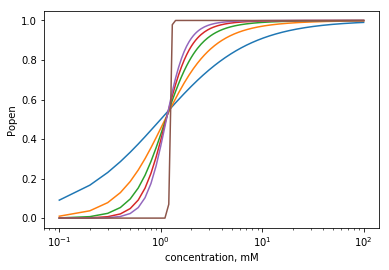

In [9]:
semilogx(plotX, plotY1) # curve
semilogx(plotX, plotY2) # curve
semilogx(plotX, plotY3) # curve
semilogx(plotX, plotY4) # curve
semilogx(plotX, plotY5) # curve
semilogx(plotX, plotY100) # curve
xlabel('concentration, mM')
ylabel('Popen');

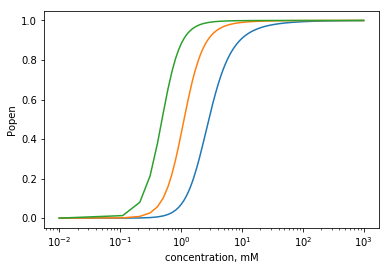

In [6]:
coeff1 = [1, 5, 3]
coeff2 = [10, 5, 3]
coeff3 = [100, 5, 3]

plotX = np.linspace(0.01, 1000, 10000)
plotY1 = popen(plotX, coeff1)
plotY2 = popen(plotX, coeff2)
plotY3 = popen(plotX, coeff3)

semilogx(plotX, plotY1) # curve
semilogx(plotX, plotY2) # curve
semilogx(plotX, plotY3) # curve

xlabel('concentration, mM')
ylabel('Popen');

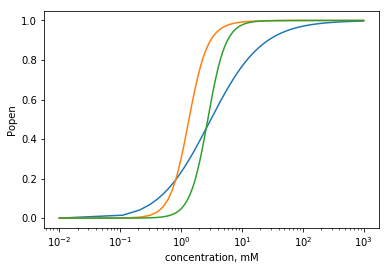

In [10]:
coeff1 = [10, 0.1, 3]
coeff2 = [10, 10, 3]
coeff3 = [10, 100, 3]

plotX = np.linspace(0.01, 1000, 10000)
plotY1 = popen(plotX, coeff1)
plotY2 = popen(plotX, coeff2)
plotY3 = popen(plotX, coeff3)

semilogx(plotX, plotY1) # curve
semilogx(plotX, plotY2) # curve
semilogx(plotX, plotY3) # curve

xlabel('concentration, mM')
ylabel('Popen');

In [19]:
from cvfit.fitting import simplex
from cvfit.errors import SSD

In [23]:
class Equation(object):
    def __init__(self):
        """        """
        self.eqname = None
        self.ncomp = 1
        self.pars = None
        self.fixed = []
        self.names = []
        self.data = None
        self.guess = None
        self._theta = None
        self.normalised = False
        
    def equation(self, x, coeff):
        ''' '''
        pass
    
    def calculate_random(self, x, sd):
        """ """
        if isinstance(x, float):
            return np.random.normal(self.equation(x, self.pars), sd, 1)[0]
        elif isinstance(x, list) or isinstance(x, np.ndarray):
            resp = []
            for each in x:
                resp.append(np.random.normal(self.equation(each, self.pars), sd, 1)[0])
            return np.array(resp)
        
    def to_fit(self, theta, x):
        self._set_theta(theta)
        return self.equation(x, self.pars)
    
    def normalise(self, data):
        pass
    
    def _set_theta(self, theta):
        for each in np.nonzero(self.fixed)[0]:   
            theta = np.insert(theta, each, self.pars[each])
        self.pars = theta
    def _get_theta(self):
        theta = self.pars[np.nonzero(np.invert(self.fixed))[0]]
        if isinstance(theta, float):
            theta = np.array([theta])
        return theta
    theta = property(_get_theta, _set_theta)
    
    def __repr__(self):
        txt = "equation " + self.eqname + "\n"
        for name, par in zip(self.names, self.pars):
            txt += "{} = {}\n".format(name, par)
        return txt

class dCK(Equation):
    def __init__(self, eqname, pars=None):
        """
        pars = [E, K, n]
        """
        self.eqname = eqname
        self.ncomp = 1
        self.pars = pars
        self.fixed = [False, False, False]
        self.names = ['E', 'K', 'n']
        
    def equation(self, c, coeff):
        '''
        Mechanism of sequential binding of n molecules followed by opening.

        R <-> AR <-> A2R <-> ... <-> AnR <-> AnR*

        coeff : list [E, K, n]
        '''

        Eterm = coeff[0] * (c**int(round(coeff[2])) / coeff[1])
        Kterm = 0.0
        for r in range(int(round(coeff[2]))):
            Kterm += scipy.special.binom(int(round(coeff[2])), r) * (c / coeff[1])**r
        return  Eterm / (1 + Kterm + Eterm)

    def propose_guesses(self, data):
        '''
        Calculate the initial guesses for fitting with Linear equation.
        '''
        #if self.Component == 1:
        #slope, intercept, r, p, stderr = scipy.stats.linregress(data.X, data.Y)
        self.guess = np.array([10.0, 0.2, 2])
        self.pars = self.guess.copy()
        
    def calculate_plot(self, X, coeff):
        plotX = np.linspace(np.floor(np.amin(X) - 1),
            np.ceil(np.amax(X) + 1), 100)
        plotY = self.equation(plotX, coeff)
        return plotX, plotY

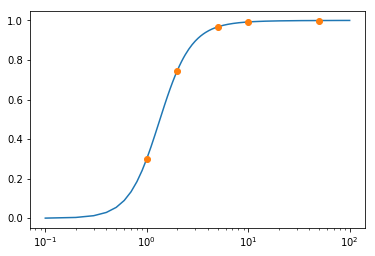

In [17]:
coeff = [10, 10, 3]
plotX = np.linspace(0.1, 100, 1000)
plotY = popen(plotX, coeff)
Xtrue = np.array([1, 2, 5, 10, 50])
Ytrue = popen(Xtrue, coeff)
semilogx(plotX, plotY); # curve
semilogx(Xtrue, Ytrue, 'o'); # points

In [72]:
theta = [10, 10, 3]
W =  [1.0] * len(Xtrue)
equation = dCK('dCK', pars=theta)
equation.fixed = [True, False, True]
theta = [6]
coeffs, smin = simplex(SSD, theta, equation, Xtrue, Ytrue, W)
print('theta=', coeffs, '\nSmin=', smin)

theta= [9.9984975] 
Smin= 1.1013143273864162e-09


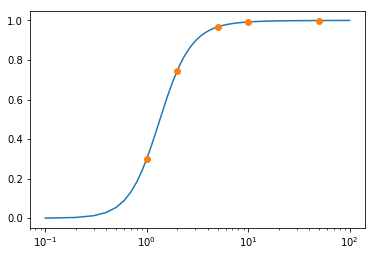

In [73]:
plotXf = np.linspace(0.1, 100, 1000)
plotYf = equation.calculate_plot(plotXf, equation.pars)
#Xtrue = np.array([1, 2, 5, 10, 50])
#Ytrue = popen(Xtrue, fcoeff)
semilogx(plotXf, plotY); # curve
semilogx(Xtrue, Ytrue, 'o'); # points